<a href="https://colab.research.google.com/github/NaomiMunyiri/Diagnosis-Prediction/blob/main/Diagnosis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **CERVICAL CANCER DIAGNOSIS PREDICTION BASED ON RISK FACTOR ANALYSIS**



**1. IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install plotly
import plotly.express as px

!pip install sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,f1_score
import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=5c9ca4e5bc48e3da86b7e5439f6f33455da5f7b3360ccaa8bf3a930ed5993514
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


**2. IMPORTING THE DATASET**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cervical_cancer.csv to cervical_cancer.csv


In [3]:
pd.read_csv("cervical_cancer.csv")

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0,0,1,8,0,...,?,?,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
cervical_cancer=pd.read_csv("cervical_cancer.csv")

In [5]:
cervical_cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0,0,1,8,0,...,?,?,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
# Input Variables

# (int) Age
# (int) Number of sexual partners
#  (int) First sexual intercourse (age)
# (int) Num of pregnancies
# (bool) Smokes
# (int) Smokes (years)
# (int) Smokes (packs/year)
# (bool) Hormonal Contraceptives
# (int) Hormonal Contraceptives (years)
# (bool) IUD
# (int) IUD (years)
# (bool) STDs (Sexually transmitted disease)
# (int) STDs (number)
# (bool) STDs:condylomatosis
# (bool) STDs:cervical condylomatosis
# (bool) STDs:vaginal condylomatosis
# (bool) STDs:vulvo-perineal condylomatosis
# (bool) STDs:syphilis
# (bool) STDs:pelvic inflammatory disease
# (bool) STDs:genital herpes
# (bool) STDs:molluscum contagiosum
# (bool) STDs:AIDS
# (bool) STDs:HIV
# (bool) STDs:Hepatitis B
# (bool) STDs:HPV
# (int) STDs: Number of diagnosis
# (int) STDs: Time since first diagnosis
# (int) STDs: Time since last diagnosis
# (bool) Dx:Cancer
# (bool) Dx:CIN
# (bool) Dx:HPV
# (bool) Dx

#Target Variables
# Most common test for diagnosis
# (bool) Hinselmann 
# (bool) Schiller
# (bool) Citology
# (bool) Biopsy

**3. DATA PRE-PROCESSING**

In [6]:
#There is missing data in the dataset above characterized by '?'.
#This could be information that a patient did not disclosed
#I replaced it with 'NaN'. 
#A Not a Number indicator may also be a sign that a variable that is supposed to be a numerical value has been corrupted by text characters or symbols.
cervical_cancer= cervical_cancer.replace('?', np.nan)
cervical_cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0,0,1,8,0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0,0,1,0.08,0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0,0,1,0.08,0,...,NaN,NaN,0,0,0,0,0,0,0,0


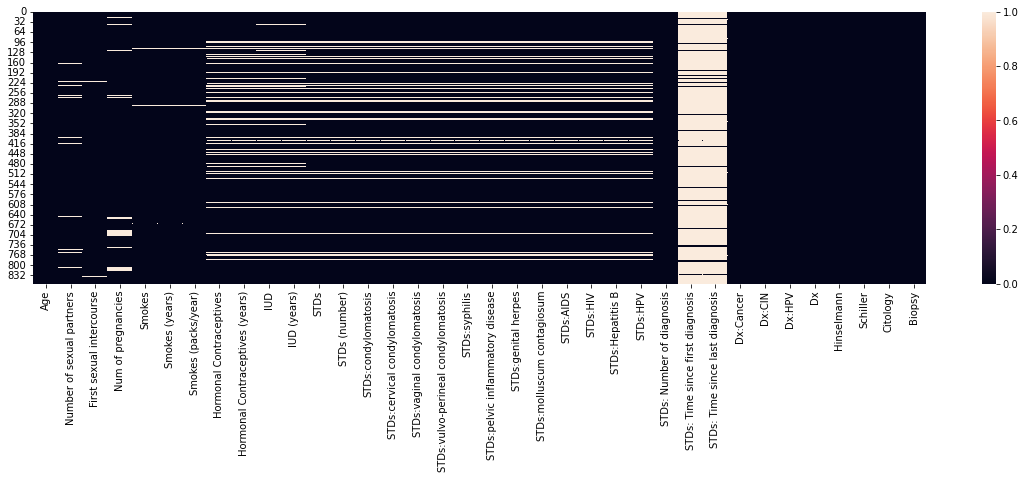

In [7]:
#using seaborn.heatmap to visualize location of missing value occurrence
plt.figure(figsize = (20,5))
sns.heatmap(cervical_cancer.isnull())

In [8]:
#too much data is missing from the columns 'STDs:Time since first diagnosis' 
#and 'STDs:Time since last diagnosis'
#These would need to be dropped
cervical_cancer= cervical_cancer.drop( columns = ['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

In [9]:
cervical_cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0,0,1,8,0,...,0,0,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0,0,1,0.08,0,...,0,0,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0,0,1,0.08,0,...,0,0,0,0,0,0,0,0,0,0


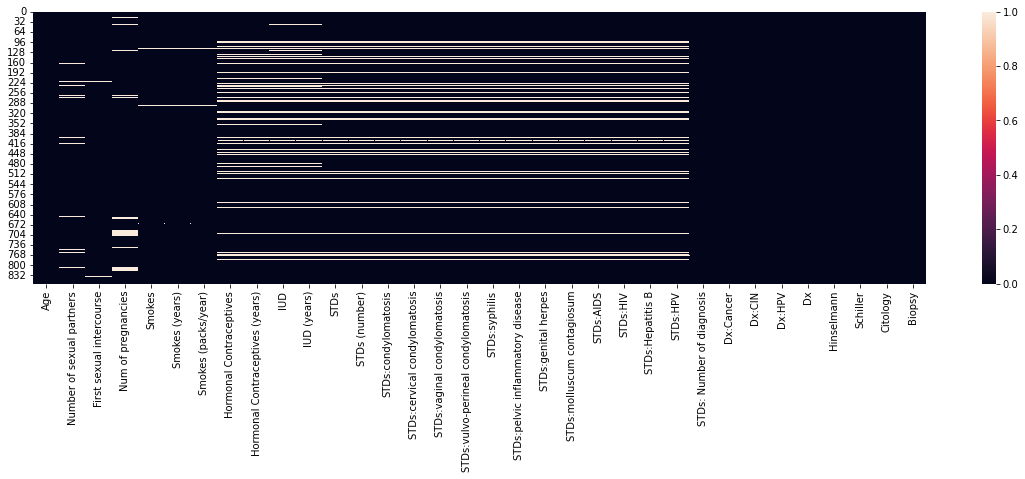

In [10]:
plt.figure(figsize = (20,5))
sns.heatmap(cervical_cancer.isnull())

In [11]:
cervical_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [12]:
#to handle the remaining null values, I needed to replace them with their mean
#statistics cannot be done efficiently with the data above because Dtype=object
#Dtype object needs to be changed to numeric
cervical_cancer= cervical_cancer.apply(pd.to_numeric)

In [13]:
cervical_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [14]:
#statistical description of the data
cervical_cancer.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#to replace null values with their mean
#cervical_cancer.isnull().any(axis=0) gives True/False flag ie Boolean, 
#which when applied on cervical_cancer.columns[], identifies variables with NaN 
for i in cervical_cancer.columns[cervical_cancer.isnull().any(axis=0)]: #applies only on NaN values
    cervical_cancer[i].fillna(cervical_cancer[i].mean(),inplace=True)

In [16]:
cervical_cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


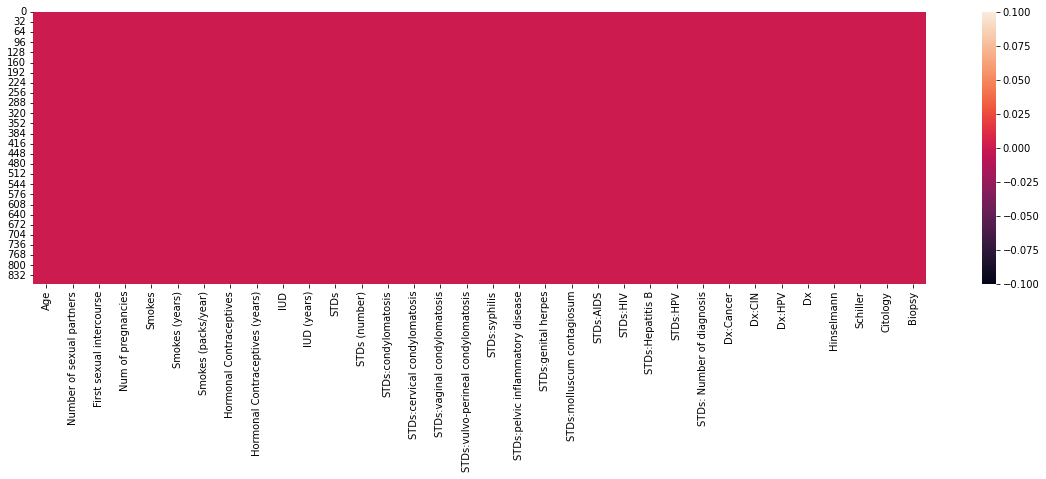

In [17]:
#using seaborn.heatmap again to check for null values
plt.figure(figsize = (20,5))
sns.heatmap(cervical_cancer.isnull())

No null values are observed

In [18]:
#splitting numerical and categorical data
numerical_data = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_data = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']            

In [19]:
target_variables=['Hinselmann', 'Schiller','Citology', 'Biopsy']

In [20]:
cervical_cancer= cervical_cancer.apply(pd.to_numeric).astype("int64")

In [22]:
print('\n%i people had negative biopsy results' %cervical_cancer['Biopsy'].value_counts()[0])
print('\n%i people had positive biopsy results.' %cervical_cancer['Biopsy'].value_counts()[1])


803 people had negative biopsy results

55 people had positive biopsy results.


The biopsy feature (target) shows that the dataset is significantly imbalanced

**4. DATA VISUALIZATION**

In [29]:
corr_matrix = cervical_cancer.corr()
corr_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs,STDs (number),...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.085971,0.367400,0.525892,0.217690,0.126351,0.279825,0.212553,0.025241,-0.001330,...,0.040861,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.085971,1.000000,-0.146640,0.077439,0.176708,0.166243,0.020453,0.005907,0.055370,0.041459,...,0.014360,0.053056,0.023699,0.016669,0.028646,0.024597,-0.039098,-0.007230,0.024067,-0.000408
First sexual intercourse,0.367400,-0.146640,1.000000,-0.054913,-0.057916,-0.054438,0.012093,-0.015234,-0.001425,0.017120,...,0.034851,-0.012480,0.067674,-0.032310,0.044369,0.036225,-0.015937,0.004385,-0.010289,0.008020
Num of pregnancies,0.525892,0.077439,-0.054913,1.000000,0.174156,0.094504,0.209686,0.148221,0.053697,0.010603,...,-0.026153,0.034912,0.036962,-0.002600,0.048578,0.014227,0.037809,0.085810,-0.027675,0.040215
Smokes (years),0.217690,0.176708,-0.057916,0.174156,1.000000,0.697681,0.052034,0.039441,0.090860,0.090711,...,0.051126,0.081028,0.054583,-0.030709,0.056588,-0.048853,0.070680,0.094654,-0.006814,0.061544
Smokes (packs/year),0.126351,0.166243,-0.054438,0.094504,0.697681,1.000000,0.039500,0.018059,0.024022,0.024344,...,-0.008927,0.025818,0.110371,-0.019015,0.110371,-0.031329,0.026489,0.013408,0.002908,0.025545
Hormonal Contraceptives (years),0.279825,0.020453,0.012093,0.209686,0.052034,0.039500,1.000000,-0.004259,-0.001011,-0.007261,...,0.052261,-0.035016,0.057436,0.004937,0.062019,-0.009792,0.038667,0.079467,0.075671,0.077805
IUD (years),0.212553,0.005907,-0.015234,0.148221,0.039441,0.018059,-0.004259,1.000000,0.022870,0.021324,...,-0.011712,0.012851,0.103557,0.006595,0.036286,0.099218,0.011766,0.085822,0.007770,0.038924
STDs,0.025241,0.055370,-0.001425,0.053697,0.090860,0.024022,-0.001011,0.022870,1.000000,0.919625,...,0.151787,0.907805,0.009638,0.006779,0.009638,-0.005129,0.056599,0.117552,0.053889,0.114148
STDs (number),-0.001330,0.041459,0.017120,0.010603,0.090711,0.024344,-0.007261,0.021324,0.919625,1.000000,...,0.077165,0.898446,-0.012141,-0.008539,-0.012141,-0.022972,0.073186,0.129649,0.061689,0.103153


(31.5, -0.5)

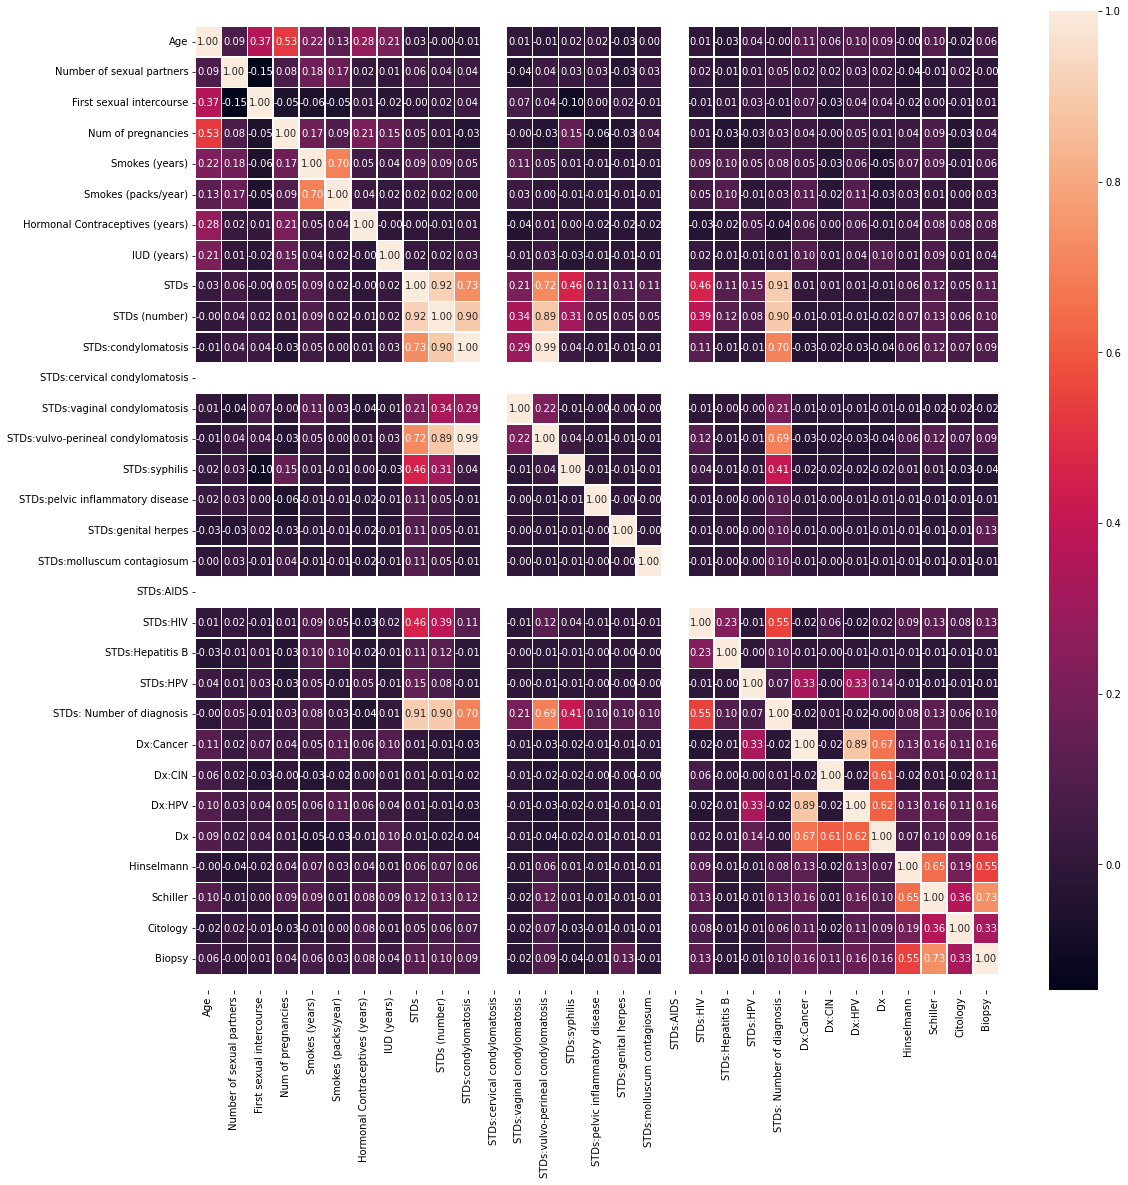

In [30]:
corr_matrix = cervical_cancer.corr()
fig, ax = plt.subplots(figsize=(18, 18))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 );
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Observation from correlation matrix


1.  The Schiller test(0.73) showed the strongest correlation with biopsy results
2.  Hinselmann(0.55) and Citology (0.33) tests showed the weakest correlation with biopsy results
1.   Negative correlations in regards to certain STDs

**5. DATA PREPARATION BEFORE TRAINING**

In [31]:
cervical_cancer.drop('STDs:AIDS',axis=1,inplace=True)
cervical_cancer.drop('STDs:cervical condylomatosis',axis=1,inplace=True)

Splitting data into train and test sets

In [33]:
x = cervical_cancer.drop('Biopsy',axis=1)
y = cervical_cancer['Biopsy']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101,stratify=y)

#splitting testing data into validation data and testing data
#x_test, x_val, y_test, y_val= train_test_split(x_test, y_test, test_size= 0.20, random_state=101,stratify=y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=101,stratify=y_train)

#describes info about train and test set
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
print("Number transactions x_val dataset: ", x_val.shape)
print("Number transactions y_val dataset: ", y_val.shape)

train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
val_0, val_1 = len(y_val[y_val==0]), len(y_val[y_val==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d, Val: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1, val_0, val_1))


Number transactions x_train dataset:  (514, 28)
Number transactions y_train dataset:  (514,)
Number transactions x_test dataset:  (215, 28)
Number transactions y_test dataset:  (215,)
Number transactions x_val dataset:  (129, 28)
Number transactions y_val dataset:  (129,)
>Train: 0=481, 1=33, Test: 0=201, 1=14, Val: 0=121, 1=8


Handling the imbalanced data by using SMOTE Technique (Synthetic Minority Over-sampling TEchnique)

In [34]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

train_0, train_1 = len(y_train_res[y_train_res==0]), len(y_train_res[y_train_res==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
val_0, val_1 = len(y_val[y_val==0]), len(y_val[y_val==1])

print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d, Val: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1, val_0, val_1))

Before OverSampling, counts of label '1': 33
Before OverSampling, counts of label '0': 481 

After OverSampling, the shape of train_X: (962, 28)
After OverSampling, the shape of train_y: (962,) 

After OverSampling, counts of label '1': 481
After OverSampling, counts of label '0': 481
>Train: 0=481, 1=481, Test: 0=201, 1=14, Val: 0=121, 1=8


**6. BUILD PREDICTION MODEL**

In [35]:
#!pip install xgboost
!pip install xgboost==1.7.1
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 193.6 MB 87 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [37]:
#learning_rate->weightage of every tree in xgboost classifier
#max_depth->max depth for each tree in xgboost model
#n_estimators->model will create max 3000 trees
#subsample->50% of observations in training dataset will be randomly selected for creating each tree
#colsample_bytree->half of features used each time randomly when new tree is created
#eval_metric->model evaluated using Area Under the Curve as a metric
#verbosity->how much of the logs will be printed

#model of class XGBClassifier is created
cervical_cancer_xgboost=xgboost.XGBClassifier(learning_rate=0.1,
                                              max_depth=5,
                                              n_estimators=3000,
                                              subsample=0.5,
                                              colsample_bytree=0.5,
                                              eval_metric='auc',
                                              verbosity=1)

#evaluation dataset while model is training
eval_set=[(x_val,y_val)]

#model training
#early_stopping_rounds->if model performance doesnt change on validation dataset
#for 10 iterations then training stops
cervical_cancer_xgboost.fit(x_train_res,
                            y_train_res,
                            early_stopping_rounds=20,
                            eval_set=eval_set,
                            verbose=True)

[0]	validation_0-auc:0.91890
[1]	validation_0-auc:0.89618
[2]	validation_0-auc:0.95610
[3]	validation_0-auc:0.91271
[4]	validation_0-auc:0.91271
[5]	validation_0-auc:0.90857
[6]	validation_0-auc:0.89824
[7]	validation_0-auc:0.89824
[8]	validation_0-auc:0.89824
[9]	validation_0-auc:0.92562
[10]	validation_0-auc:0.92872
[11]	validation_0-auc:0.92769
[12]	validation_0-auc:0.93492
[13]	validation_0-auc:0.94525
[14]	validation_0-auc:0.95351
[15]	validation_0-auc:0.94835
[16]	validation_0-auc:0.96178
[17]	validation_0-auc:0.96281
[18]	validation_0-auc:0.95145
[19]	validation_0-auc:0.94215
[20]	validation_0-auc:0.94008
[21]	validation_0-auc:0.93182
[22]	validation_0-auc:0.93079
[23]	validation_0-auc:0.93285
[24]	validation_0-auc:0.93698
[25]	validation_0-auc:0.93802
[26]	validation_0-auc:0.93698
[27]	validation_0-auc:0.94008
[28]	validation_0-auc:0.94008
[29]	validation_0-auc:0.93595
[30]	validation_0-auc:0.93595
[31]	validation_0-auc:0.93802
[32]	validation_0-auc:0.93595
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=3000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

Model performance increased on the validation set as number of trees in model increased.

36 trees built

**7. Evaluate Model Performance**

In [38]:
#predict_proba-> gives probability of predictions for every observation supplied
             # ->it provides 2 values for every observation i.e 0 & 1
y_train_pred=cervical_cancer_xgboost.predict_proba(x_train_res)[:,1]
y_valid_pred=cervical_cancer_xgboost.predict_proba(x_val)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train_res, y_train_pred),
                                              roc_auc_score(y_val, y_valid_pred)))


AUC Train: 0.9807
AUC Valid: 0.9628


Performance on 1st iteration of validation dataset is 0.96.
There us possibility that performance increases if hyperparameters are tuned

**8. Hyperparameter Tuning**

GridSearchCV is used for hyperparameter tuning.

It tries all possible combinations of hyperparameters specified and gives result of model performance on validation dataset using cross validation technique

It helps identify the best set of parameters to use

In [ ]:
learning_rate_list=[0.001,0.01,0.002,0.02]
max_depth_list=[10,20,13,9]
n_estimators_list=[1000,500,700,3000]
colsample_bytree_list=[0.3,0.1,0.2,0.4]

#list pf possible values transformed into a dictionary in the required format 
params_dict={"learning_rate": learning_rate_list,
             "max_depth": max_depth_list,
             "n_estimators": n_estimators_list,
             "colsample_bytree": colsample_bytree_list}

num_combinations=1
for v in params_dict.values(): num_combinations *= len(v)
#calculates number of possible combinations 
print(num_combinations)
params_dict

256


{'learning_rate': [0.001, 0.01, 0.002, 0.02],
 'max_depth': [10, 20, 13, 9],
 'n_estimators': [1000, 500, 700, 3000],
 'colsample_bytree': [0.3, 0.1, 0.2, 0.4]}

In [ ]:
#default roc formula isnt suitable for GridSearchCV so wrapper created below 
#with three arguments instead of 2
def my_roc_auc_score(model, x, y):return roc_auc_score(y, model.predict_proba(x)[:,1])

#estimator->arent tuned
#params to be tuned are in param_grid
#cv->how many samples will data be split into for cross validation
#scoring->formula for calculating scoring parameter ie auc
#train_score->print training score

#object of class cervical_cancer_xgboost_hp is created
cervical_cancer_xgboost_hp=GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                                        #colsample_bytree=0.25,
                                                                        eval_metric='auc',
                                                                        use_label_encoder=False),
                                        param_grid=params_dict,
                                        cv=3,
                                        scoring=my_roc_auc_score,
                                        return_train_score=True,
                                        verbose=False)
cervical_cancer_xgboost_hp.fit(x,y)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                         

Analyzing the output of the grid search.

Output is analyzed and sorted based on rank of test score

In [ ]:
#results seen on cv_results_
#results converted into pandas dataframe
#variables sorted by rank
cancer_cv_results=pd.DataFrame(cervical_cancer_xgboost_hp.cv_results_)
cancer_cv_results=cancer_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                                    'param_learning_rate','param_max_depth','param_n_estimators','param_colsample_bytree']]

cancer_cv_results.sort_values(by='rank_test_score',inplace=True)
cancer_cv_results                                   

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators,param_colsample_bytree
165,1,0.961740,0.972020,0.002,20,500,0.2
169,1,0.961740,0.972020,0.002,13,500,0.2
161,1,0.961740,0.972020,0.002,10,500,0.2
173,1,0.961740,0.972020,0.002,9,500,0.2
138,5,0.961615,0.965674,0.001,13,700,0.2
...,...,...,...,...,...,...,...
223,249,0.946710,0.995328,0.01,9,3000,0.4
243,253,0.942641,0.996604,0.02,10,3000,0.4
247,253,0.942641,0.996604,0.02,20,3000,0.4
251,253,0.942641,0.996604,0.02,13,3000,0.4


**Summary of GridSearchCV**



*   1st row is highest rank in the data
*   Value of learning rate is 0.001
*   Value of max depth is 2
*   Value of n_estimators is 700

These combinations can be used to build the final model

**9. Final Model**

In [39]:
#x_train_matrix=x_train_res.values
#x_test_matrix=x_test.values
#x_val_matrix=x_val.values
#y_val_matrix=y_val.values
cervical_cancer_xgboost_final=xgboost.XGBClassifier(learning_rate=0.001,
                                                    max_depth=20,
                                                    n_estimators=1000,
                                                    subsample=0.5,
                                                    colsample_bytree=0.3,
                                                    eval_metric='auc',
                                                    verbosity=1,
                                                    use_label_encoder=False)

#eval_set=[(x_train_matrix, y_train_res),(x_val_matrix, y_val_matrix)]

eval_set=[(x_train_res, y_train_res),(x_val, y_val)]

'''cervical_cancer_xgboost_final.fit(
                                  x_train_matrix,
                                  y_train_res,
                                  early_stopping_rounds=20,
                                  eval_set=eval_set,
                                  verbose=False)'''

cervical_cancer_xgboost_final.fit(
                                  x_train_res,
                                  y_train_res,
                                  early_stopping_rounds=20,
                                  eval_set=eval_set,
                                  verbose=False)

#0.01,7,1000,0.15-merged
#0.03,5,700,0.15-merged 97%

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=20, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [40]:
#y_train_pred=cervical_cancer_xgboost_final.predict_proba(x_train_matrix)[:,1]
#y_valid_pred=cervical_cancer_xgboost_final.predict_proba(x_val_matrix)[:,1]

y_train_pred=cervical_cancer_xgboost_final.predict_proba(x_train_res)[:,1]
y_valid_pred=cervical_cancer_xgboost_final.predict_proba(x_val)[:,1]


print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train_res, y_train_pred),
                                              roc_auc_score(y_val, y_valid_pred)))


AUC Train: 0.9641
AUC Valid: 0.9628


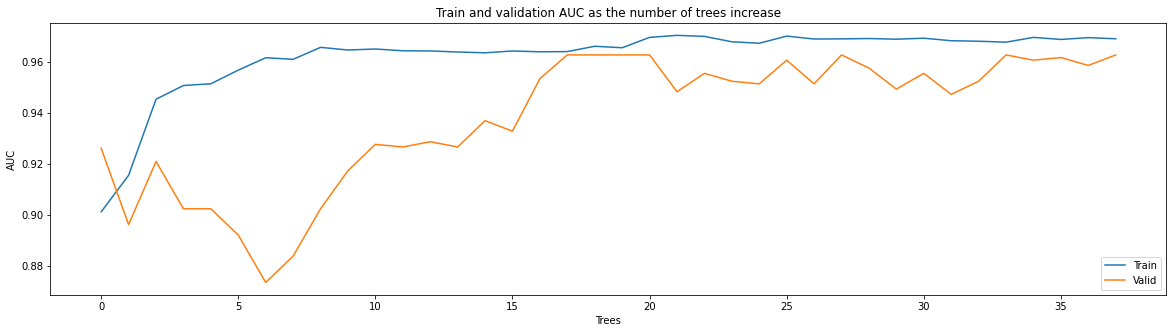

In [41]:
evaluation_results=cervical_cancer_xgboost_final.evals_result()
train_auc_tree=evaluation_results['validation_0']['auc']
valid_auc_tree=evaluation_results['validation_1']['auc']

plt.figure(figsize=(20,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='Valid')

plt.title("Train and validation AUC as the number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [42]:
from sklearn.metrics import accuracy_score
#xg_pred=cervical_cancer_xgboost_final.predict(x_test_matrix)
xg_pred=cervical_cancer_xgboost_final.predict(x_test)
predictions = [round(value) for value in xg_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.21%


In [43]:
print('Confusion Matrix:\n ',confusion_matrix(y_test,xg_pred))
print('Classification Report:\n ',classification_report(y_test,xg_pred))

Confusion Matrix:
  [[198   3]
 [  3  11]]
Classification Report:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99       201
           1       0.79      0.79      0.79        14

    accuracy                           0.97       215
   macro avg       0.89      0.89      0.89       215
weighted avg       0.97      0.97      0.97       215



In [ ]:
test_scores=accuracy_score(y_test,cervical_cancer_xgboost_final.predict(x_test))*100
train_scores=accuracy_score(y_train_res,cervical_cancer_xgboost_final.predict(x_train_res))*100
val_scores=accuracy_score(y_val,cervical_cancer_xgboost_final.predict(x_val))*100

results_df=pd.DataFrame(data=[["XG Boost", train_scores, test_scores, val_scores]],
                        columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', 'Validation Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %,Validation Accuracy %
0,XG Boost,92.411642,97.209302,96.899225


In [44]:
import joblib
from numpy import int64
#test1=[[51,3,17,6,34,3.4,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0]] #1
#test1=[[18,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]] #0
test1=[[38,2,15,4,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0]] #1



test2= pd.DataFrame(test1,columns=['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs','STDs (number)','STDs:condylomatosis',
                'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease',
                'STDs:genital herpes','STDs:molluscum contagiosum','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','Dx:Cancer','Dx:CIN','Dx:HPV',
                'Dx','Hinselmann', 'Schiller','Citology'],dtype=int64)
# type(test2)
p=cervical_cancer_xgboost_final.predict(test2)
print("Cancer [0 - No Yes - 1] :\n Result : ",p[0])



Cancer [0 - No Yes - 1] :
 Result :  1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# saving our model # model , filename-model1_jlib
#joblib.dump(cervical_cancer_xgboost_final , '/content/drive/MyDrive/cervical_cancer_model/cancer/model')

In [ ]:
import joblib
from numpy import int64

In [ ]:
#cervical_cancer_xgboost_final.save_model('/content/drive/MyDrive/cervical_cancer_model/test')

In [45]:
import pickle
filename='cancermodel2.sav'
pickle.dump(cervical_cancer_xgboost_final, open(filename,'wb'))

In [46]:
loaded_model=pickle.load(open(filename,'rb'))

In [47]:
test4=[[18,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
test5= pd.DataFrame(test4,columns=['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs','STDs (number)','STDs:condylomatosis',
                'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease',
               'STDs:genital herpes','STDs:molluscum contagiosum','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','Dx:Cancer','Dx:CIN','Dx:HPV',
                'Dx','Hinselmann', 'Schiller','Citology'],dtype=int64)
loaded_model.predict(test5)

array([0])